In [92]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

In [91]:
classfier=Sequential()

In [93]:
#Convlution layer
classfier.add(Conv2D(64,(3,3),input_shape=(150,150,3),activation='relu'))

#max pooling
classfier.add(MaxPooling2D(pool_size=(2,2)))

#Add another layer
classfier.add(Conv2D(64,(3,3),activation='relu'))

#max pooling
classfier.add(MaxPooling2D(pool_size=(2,2)))
#Add another layer
classfier.add(Conv2D(64,(3,3),activation='relu'))

#max pooling
classfier.add(MaxPooling2D(pool_size=(2,2)))

In [94]:
#faltting
classfier.add(Flatten())

In [95]:
#dense layer
classfier.add(Dense(units=150,activation='relu'))
classfier.add(Dense(units=150,activation='relu'))

In [96]:
classfier.add(Dense(units=3,activation='softmax'))

In [97]:
from keras.preprocessing.image import ImageDataGenerator as I
train_datagen=I(rescale=.1/255,
               shear_range=0.2,
               zoom_range=0.2,
               horizontal_flip=True)


In [98]:
## Scaling test data
##no  data augmentation
test_datagen = I(rescale=1./255)

In [99]:
classfier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [100]:
train_set = train_datagen.flow_from_directory('data\\train',
                                               target_size=(150, 150),
                                               batch_size=10,
                                               class_mode='categorical')

Found 1050 images belonging to 3 classes.


In [101]:
## Importng test data
test_set = test_datagen.flow_from_directory('data\\test',
                                            target_size=(150, 150),
                                            batch_size=6,
                                            class_mode='categorical')

Found 105 images belonging to 3 classes.


In [102]:
classfier.fit_generator(
        train_set,
        steps_per_epoch=100,
        epochs=10,
        validation_data=test_set,
        validation_steps=30)

Epoch 1/10
100/100 [==============================] - 37s 367ms/step - loss: 0.9620 - acc: 0.4830 - val_loss: 7.9324 - val_acc: 0.3446
Epoch 2/10
100/100 [==============================] - 35s 346ms/step - loss: 0.7859 - acc: 0.6430 - val_loss: 1.6719 - val_acc: 0.4713
Epoch 3/10
100/100 [==============================] - 35s 345ms/step - loss: 0.7240 - acc: 0.6690 - val_loss: 3.9794 - val_acc: 0.4655
Epoch 4/10
100/100 [==============================] - 34s 345ms/step - loss: 0.6639 - acc: 0.7100 - val_loss: 2.0619 - val_acc: 0.6554
Epoch 5/10
100/100 [==============================] - 34s 345ms/step - loss: 0.6550 - acc: 0.7380 - val_loss: 2.5067 - val_acc: 0.6322
Epoch 6/10
100/100 [==============================] - 35s 348ms/step - loss: 0.6001 - acc: 0.7480 - val_loss: 2.2811 - val_acc: 0.6322
Epoch 7/10
100/100 [==============================] - 35s 351ms/step - loss: 0.5160 - acc: 0.7930 - val_loss: 3.0070 - val_acc: 0.6441
Epoch 8/10
100/100 [==============================] - 3

In [80]:
## prediction of single new data
import numpy as np
from keras.preprocessing import image
test_image= image.load_img('data\\inference\\bike34.jpg'
                           ,target_size =(150,150))


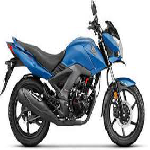

In [81]:
test_image

In [82]:
test_image = image.img_to_array(test_image)

In [83]:
test_image=test_image.reshape(1,150,150,3)

In [84]:
result = classfier.predict(test_image)

In [85]:
np.around(result)

array([[0., 1., 0.]], dtype=float32)

In [86]:
result=result.argmax()

In [87]:
result

1

In [88]:
if result==0:
    prediction = 'airplane'
elif result==1:
    prediction = 'car'
else:
    prediction="bike"

In [89]:
prediction

'car'

In [105]:
#Save the model to furtur inference
model_json=classfier.to_json()
with open("Muti-class(airplan,bik,car).json","w") as json_file:
    json_file.write(model_json)
classfier.save_weights("Muti-class(airplan,bik,car).h5")
print("save model to disk")

save model to disk
